In [38]:
'''
Data analysis for the beer dataset
'''

'\nData analysis for the beer dataset\n'

In [39]:
# import libraries

# numerical analytics
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
import datetime
import re, string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# machine learning 
from sklearn.model_selection import train_test_split

In [40]:
# read data
data = pd.read_csv('beer_data_set.csv')

# Data Information

In [41]:
# inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

In [42]:
print(data.shape)
data.head()

(5558, 21)


,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


<AxesSubplot:>

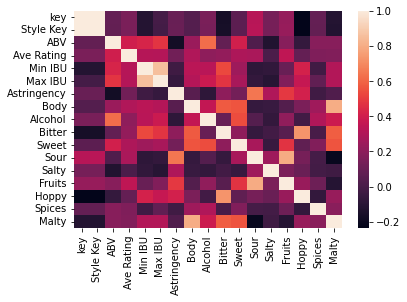

In [43]:
# inspect variables coreleration
sns.heatmap(data.corr())

array([[<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'Style Key'}>,
        <AxesSubplot:title={'center':'ABV'}>,
        <AxesSubplot:title={'center':'Ave Rating'}>],
       [<AxesSubplot:title={'center':'Min IBU'}>,
        <AxesSubplot:title={'center':'Max IBU'}>,
        <AxesSubplot:title={'center':'Astringency'}>,
        <AxesSubplot:title={'center':'Body'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Bitter'}>,
        <AxesSubplot:title={'center':'Sweet'}>,
        <AxesSubplot:title={'center':'Sour'}>],
       [<AxesSubplot:title={'center':'Salty'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Hoppy'}>,
        <AxesSubplot:title={'center':'Spices'}>],
       [<AxesSubplot:title={'center':'Malty'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

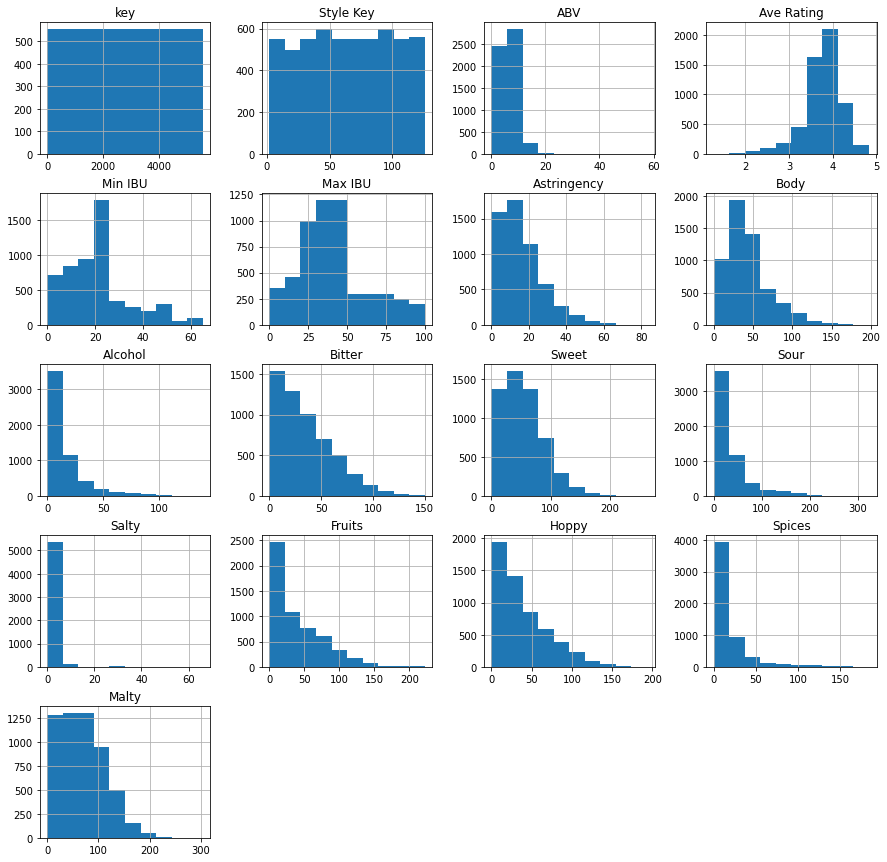

In [44]:
# inspect the distribution of the data
data.hist(figsize=(15,15))

In [45]:
# inspect unique values
print(data.nunique())

Name           5317
key            5558
Style           112
Style Key       112
Brewery        1498
Description    3347
ABV             229
Ave Rating      289
Min IBU          21
Max IBU          25
Astringency      73
Body            165
Alcohol         116
Bitter          141
Sweet           191
Sour            222
Salty            47
Fruits          185
Hoppy           156
Spices          155
Malty           217
dtype: int64


In [46]:
# inspect na values
print(data.isna().any())

Name            True
key            False
Style          False
Style Key      False
Brewery        False
Description    False
ABV            False
Ave Rating     False
Min IBU        False
Max IBU        False
Astringency    False
Body           False
Alcohol        False
Bitter         False
Sweet          False
Sour           False
Salty          False
Fruits         False
Hoppy          False
Spices         False
Malty          False
dtype: bool


In [9]:
# inspect Brewery column
print(data['Brewery'].nunique()) #total number of brewers
data['Brewery'].unique() #name of the brewers

1498


array(['Alaskan Brewing Co.', 'Long Trail Brewing Co.',
       'Uerige Obergärige Hausbrauerei', ..., 'Russell Brewing Company',
       'Aslin Beer Company', 'Stony Creek Brewery'], dtype=object)

In [10]:
# there are some rows that contain 'error entering this description' in their description
data.loc[data['Description'] == 'error entering this description', :]

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
3166,Alpha King,2004,Pale Ale - American,48,3 Floyds Brewing Co.,error entering this description,6.66,4.26,25,50,...,25,6,45,37,41,1,46,78,6,55
5551,Winter Ale,694,Winter Warmer,17,Fremont Brewing Company,error entering this description,8.00,3.87,35,50,...,80,26,56,79,19,0,27,44,26,122


# Data pre-processing

In [5]:
# create dataframe to store name and key
name_key = data[["Name", "key"]].drop_duplicates().reset_index(drop=True)
# create dataframe to store style and key
style_key = data[["Style", "Style Key"]].drop_duplicates().reset_index(drop=True)
# create keys for brewery
brewery_key = pd.factorize(data['Brewery'], sort=True)[0]
data.insert(2, 'Brewery Key', brewery_key)
# create dataframe to store style and key
brewery_key = data[["Brewery", "Brewery Key"]].drop_duplicates().reset_index(drop=True)
# drop columns: Name, Style
df_beer = data.drop(['Name', 'Style', 'Brewery'], axis = 1)
df_beer.head(10)

,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
3,254,1402,8,Notes:,8.5,4.15,25,50,13,55,31,47,101,18,1,49,40,16,119
4,255,1019,8,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
6,257,1402,8,Notes:,6.0,4.10,25,50,22,45,13,46,62,25,1,34,60,4,103
7,258,1464,8,Notes:Classified as a German Altbier by the Wi...,5.3,3.46,25,50,28,40,3,40,58,29,0,36,54,8,97
8,259,1237,8,Notes:,5.0,3.60,25,50,18,49,5,37,73,22,0,21,37,4,98
9,260,1336,8,"Notes:OMB’s flagship, Copper, is an authentic ...",4.8,4.10,25,50,25,35,4,38,39,13,1,8,60,16,97


In [6]:
# remove rows that contain only 'Notes:' in description - they are NA values

# 1. remove the 'Notes' in the description - so that rows that contain only 'Notes:' in description will become empty
df_beer['Description'] = df_beer['Description'].str.replace(r'Notes:', "", regex = True)
print(df_beer.shape)

# 2. create a new dataframe with rows that contain description with length greater than 0 (rows that have no empty description)
df_beer1 = df_beer[df_beer['Description'].str.split().str.len().gt(0)]
print(df_beer1.shape)

# When inspecting the dataset, there are some rows that contain description of 'error entering this description', these rows need to be removed as well
df_beer1.drop(df_beer1[df_beer1['Description'] == 'error entering this description'].index, axis=0, inplace = True)

#check the shape of the new df if we have removed the empty description rows
print(df_beer1.shape)
df_beer1.head(10)

(5558, 19)
(3362, 19)
(3360, 19)


/tmp/ipykernel_6857/3773452109.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beer1.drop(df_beer1[df_beer1['Description'] == 'error entering this description'].index, axis=0, inplace = True)


,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,"Richly malty and long on the palate, with just...",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,"This malty, full-bodied double alt is also kno...",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,Long Trail Ale is a full-bodied amber ale mode...,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
4,255,1019,8,Just cause it's dark and German doesn't mean i...,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,Called 'Dark Double Alt' on the label.Seize th...,7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
7,258,1464,8,Classified as a German Altbier by the Widmer B...,5.3,3.46,25,50,28,40,3,40,58,29,0,36,54,8,97
9,260,1336,8,"OMB’s flagship, Copper, is an authentic Düssel...",4.8,4.10,25,50,25,35,4,38,39,13,1,8,60,16,97
11,262,1402,8,Uerige Alt is the most bittered beer in German...,4.7,4.00,25,50,34,48,9,55,59,25,1,32,68,12,121
12,263,1481,8,Check out a piece of Nashville brewing history...,5.1,3.54,25,50,10,19,1,21,30,11,4,8,24,2,65
13,264,616,8,This ale is the first brewed in Kansas since p...,5.6,3.69,25,50,7,30,5,43,43,13,1,13,50,6,93


In [7]:
# define a function for text cleaning 
def preprocess(text):

    # Remove special characters 
    text = re.sub(r'\W', ' ', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # remove space 
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # remove all numbers
    text = re.sub(r'\d+','', text) 

    # remove \t
    text = re.sub(r'\t','', text) 

    # substitute multiple white spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)

    # Remove punctations 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub('', text)

    return text

In [8]:
#apply text preprocess function
df_beer1['Description'] = df_beer1['Description'].apply(lambda x: preprocess(x))
df_beer1

/tmp/ipykernel_6857/1623173113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beer1['Description'] = df_beer1['Description'].apply(lambda x: preprocess(x))


,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,Richly malty and long on the palate with just ...,5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,This malty full bodied double alt is also know...,7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,Long Trail Ale is full bodied amber ale modele...,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
4,255,1019,8,Just cause it dark and German doesn mean it an...,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,Called Dark Double Alt on the label Seize the ...,7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,692,755,17,A new season means new adventures We created S...,6.5,3.86,35,50,9,72,26,48,104,27,1,43,29,27,96
5552,695,1118,17,This hearty American pale ale contains rich bl...,6.0,3.63,35,50,15,31,23,16,54,43,0,54,14,140,58
5554,697,55,17,This is the forty fifth annual Our Special Ale...,6.9,3.79,35,50,22,73,9,58,87,23,0,48,91,44,104
5556,699,1210,17,Chanukah Beer pours rich crystal clear chestnu...,8.0,3.61,35,50,6,64,30,57,78,15,1,28,57,23,129


In [9]:
# create the vocab list from excel file
Mouthfeel = pd.read_excel('Beer Descriptors Simplified.xlsx',sheet_name='Mouthfeel')
Taste = pd.read_excel('Beer Descriptors Simplified.xlsx',sheet_name='Taste')
Flavor = pd.read_excel('Beer Descriptors Simplified.xlsx',sheet_name='Flavor And Aroma')

In [10]:
# Drop all impact columns
Mouthfeel = Mouthfeel.drop(['Impact','Impact.1','Impact.2'], axis = 1)
Taste = Taste.drop(['Impact','Impact.1','Impact.2','Impact.3'], axis = 1)
Flavor = Flavor.drop(['Impact','Impact.1','Impact.2','Impact.3'], axis = 1)

In [11]:
# combine three data frames into one
df_descriptors = pd.concat([Mouthfeel,Taste,Flavor], axis = 1)
df_descriptors

,Astringent,Body,Alcoholic,Bitter,Sweet,Sour,Salty,Fruity,Hoppy,Spices,Malty
0,acetic,acacia,absinthe,ahtanum,acacia,acetic,caviar,berries,ahtanum,absinthe,amaranth
1,acid,acasia,agave,amarillo,acasia,acid,cracker,berry,amarillo,allspice,azrael
2,acidic,amaranth,alcohol,anjilanaka,apple,acidic,crackers,blabaer,apollo,anise,barley
3,acidified,amargor,alcoholic,apollo,apples,acidified,crackery,blackberries,azacca,aniseed,barleymalt
4,acidifying,big,alcoholized,ashtray,apricot,acidifying,salt,blackberry,bitter,annatto,barleys
...,...,...,...,...,...,...,...,...,...,...,...
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oreos
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seedy
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toffe
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tofee


In [12]:
# match vocab list to the description by spacy matcher
import spacy
nlp = spacy.load('en_core_web_sm')

2022-07-06 10:43:03.304198: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-06 10:43:03.304239: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
# Import the PhraseMatcher library
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [14]:
# extract words as a list from the df_descriptors
def extract_word_list(df,column):
    word_list = []
    word_list = df[column].tolist()
    word_list= [x for x in word_list if str(x) != 'nan']
    return word_list


In [15]:
Astringent = extract_word_list(df_descriptors,'Astringent')
Body = extract_word_list(df_descriptors,'Body')
Alcoholic = extract_word_list(df_descriptors,'Alcoholic')
Bitter = extract_word_list(df_descriptors,'Bitter')
Sweet = extract_word_list(df_descriptors,'Sweet')
Sour = extract_word_list(df_descriptors,'Sour')
Salty = extract_word_list(df_descriptors,'Salty')
Fruity = extract_word_list(df_descriptors,'Fruity')
Hoppy = extract_word_list(df_descriptors,'Hoppy')
Spices = extract_word_list(df_descriptors,'Spices')
Malty = extract_word_list(df_descriptors,'Malty')

In [16]:
# convert each phrase to phrase pattern
Astringent_pattern = [nlp(x) for x in Astringent]
Body_pattern = [nlp(x) for x in Body]
Alcoholic_pattern = [nlp(x) for x in Alcoholic]
Bitter_pattern = [nlp(x) for x in Bitter]
Sweet_pattern = [nlp(x) for x in Sweet]
Sour_pattern = [nlp(x) for x in Sour]
Salty_pattern = [nlp(x) for x in Salty]
Fruity_pattern = [nlp(x) for x in Fruity]
Hoppy_pattern = [nlp(x) for x in Hoppy]
Spices_pattern = [nlp(x) for x in Spices]
Malty_pattern = [nlp(x) for x in Malty]

In [17]:
# get description from the df_beer1 to create a Doc object
description = df_beer1['Description']

In [18]:
# match the description with each pattern and create a new dataframe with matched patterns
Astringent_brand = []
Body_brand = []
Alcoholic_brand = []
Bitter_brand = []
Sweet_brand = []
Sour_brand = []
Salty_brand = []
Fruity_brand = []
Hoppy_brand = []
Spices_brand = []
Malty_brand = []

for text in description:
    temp = nlp(text)
    matcher.add('Astringent', None, *Astringent_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Astringent_brand.append(1)
    else: Astringent_brand.append(0)
    
    matcher.remove('Astringent')
    matcher.add('Body', None, *Body_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Body_brand.append(1)
    else: Body_brand.append(0)

    matcher.remove('Body')
    matcher.add('Alcoholic', None, *Alcoholic_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Alcoholic_brand.append(1)
    else: Alcoholic_brand.append(0)

    matcher.remove('Alcoholic')
    matcher.add('Bitter', None, *Bitter_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Bitter_brand.append(1)
    else: Bitter_brand.append(0)

    matcher.remove('Bitter')
    matcher.add('Sweet', None, *Sweet_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Sweet_brand.append(1)
    else: Sweet_brand.append(0)

    matcher.remove('Sweet')
    matcher.add('Sour', None, *Sour_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Sour_brand.append(1)
    else: Sour_brand.append(0)

    matcher.remove('Sour')
    matcher.add('Salty', None, *Salty_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Salty_brand.append(1)
    else: Salty_brand.append(0)

    matcher.remove('Salty')
    matcher.add('Fruity', None, *Fruity_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Fruity_brand.append(1)
    else: Fruity_brand.append(0)

    matcher.remove('Fruity')
    matcher.add('Hoppy', None, *Hoppy_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Hoppy_brand.append(1)
    else: Hoppy_brand.append(0)

    matcher.remove('Hoppy')
    matcher.add('Spices', None, *Spices_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Spices_brand.append(1)
    else: Spices_brand.append(0)

    matcher.remove('Spices')
    matcher.add('Malty', None, *Malty_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Malty_brand.append(1)
    else: Malty_brand.append(0)    

    matcher.remove('Malty')

In [19]:
# create a dataframe with matched patterns
df_brand = pd.DataFrame({'Astringent':Astringent_brand,
                            'Body':Body_brand,
                            'Alcoholic':Alcoholic_brand,
                            'Bitter':Bitter_brand,
                            'Sweet':Sweet_brand,
                            'Sour':Sour_brand,
                            'Salty':Salty_brand,
                            'Fruity':Fruity_brand,
                            'Hoppy':Hoppy_brand,
                            'Spices':Spices_brand,
                            'Malty':Malty_brand})

In [21]:
# rename the columns
df_brand.columns = ['Astringency','Body','Alcohol','Bitter','Sweet','Sour','Salty','Fruits','Hoppy','Spices','Malty']

In [23]:
df_beer1 = df_beer1.reset_index(drop=True)

In [ ]:
# merge dataframe with df_beer1 and add prefix 'description_' to each column
df_clean = pd.merge(df_beer1,df_brand,left_index=True,right_index=True,how='left',suffixes=('_customer','_description'))
df_clean.head()

In [26]:
# export to a csv file
df_clean.to_csv('df_clean.csv')

## Build the model

In [58]:
# read file
df_clean = pd.read_csv("df_clean.csv",index_col=0)

In [59]:
# make a copy
df_new = df_clean.copy()
df_new.shape

(3360, 30)

In [60]:
# feature engineering 
df_new["Ave IBU"] = (df_new["Min IBU"] + df_new["Max IBU"])/2

#drop unused columns
df_new = df_new.drop(['Min IBU', 'Max IBU', 'key', 'Description'], axis = 1)
df_new.shape

(3360, 27)

In [61]:
# split the data with split
from sklearn.model_selection import StratifiedShuffleSplit
train_set, test_set = train_test_split(df_new, test_size=0.3, random_state=42)
print(train_set.shape)
print(test_set.shape)

(2352, 27)
(1008, 27)


In [62]:
# separate the dependent and independent variable
x_train = train_set.drop(["Ave Rating"], axis = 1)
y_train = train_set[["Ave Rating"]]

x_test = test_set.drop(["Ave Rating"], axis = 1)
y_test = test_set[["Ave Rating"]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2352, 26)
(1008, 26)
(2352, 1)
(1008, 1)


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## scale the customer reviews
# step 1: we scale the reviews by row and create a new dataframe
scaled_customer = pd.DataFrame(scaler.fit_transform(x_train.iloc[:,3:14].T).T,columns=x_train.iloc[:,3:14].columns) 

# step 2: drop unscaled reviews 
x_drop = x_train.drop(x_train.iloc[:,3:14],axis=1).reset_index(drop=True)

# step 3: concat the scaled customer reviews 
x_train_scaled = pd.concat([x_drop,scaled_customer],axis=1)

# scale the numerical values of the whole dataframe (excluding categorical variable)
x_train_scaled.iloc[:,[2,14,15,16,17,18,19,20,21,22,23,24,25]] = scaler.fit_transform(x_train_scaled.iloc[:,[2,14,15,16,17,18,19,20,21,22,23,24,25]]) 
x_train_scaled.head()

,Brewery Key,Style Key,ABV,Astringency_description,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,...,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,Fruits_customer,Hoppy_customer,Spices_customer,Malty_customer
0,848,95,-0.342162,0,1,0,1,1,0,0,...,2.800877,-0.171683,0.436641,-0.023014,-0.592885,0.795650,-1.106751,-0.496241,-0.356736,0.420017
1,70,61,-0.668782,0,0,0,0,0,0,0,...,0.756488,-1.260983,-0.082427,-0.870014,-0.295936,-0.365574,-0.281837,0.380671,-0.726914,1.072932
2,995,122,-0.954574,1,0,1,0,0,1,0,...,-0.937596,-0.076483,-1.229199,-0.869481,2.066340,1.201840,1.736132,-0.550202,-0.347399,-1.483306
3,1492,69,1.086798,0,0,0,0,0,0,0,...,1.853429,0.588101,0.341595,0.169933,-0.805169,0.560868,-0.970655,-0.992568,-0.061188,0.948939
4,1227,17,-0.138025,0,1,0,0,0,0,0,...,0.377937,-0.084550,-0.951876,-0.103685,-0.675925,0.677705,-0.510356,-0.913541,3.847466,-0.673335


In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
# scale x_test
## scale the customer reviews
# step 1: we scale the reviews by row and create a new dataframe
scaled_customer_test = pd.DataFrame(scaler.fit_transform(x_test.iloc[:,3:14].T).T,columns=x_test.iloc[:,3:14].columns) 

# step 2: drop unscaled reviews 
x_drop_test = x_test.drop(x_test.iloc[:,3:14],axis=1).reset_index(drop=True)

# step 3: concat the scaled customer reviews 
x_test_scaled = pd.concat([x_drop_test,scaled_customer_test],axis=1)

# scale the numerical values of the whole dataframe (excluding categorical variable)
x_test_scaled.iloc[:,[2,14,15,16,17,18,19,20,21,22,23,24,25]] = scaler.fit_transform(x_test_scaled.iloc[:,[2,14,15,16,17,18,19,20,21,22,23,24,25]]) 

x_test_scaled.head()

,Brewery Key,Style Key,ABV,Astringency_description,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,...,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,Fruits_customer,Hoppy_customer,Spices_customer,Malty_customer
0,34,46,-0.686938,1,1,0,1,0,0,0,...,-0.504882,-1.120027,-0.038642,0.521146,-0.658531,-0.480610,-0.151850,0.423399,-0.444259,1.003943
1,706,119,-0.403037,0,0,1,0,1,1,0,...,-1.109523,-0.047896,-1.261251,0.218514,2.339444,1.310480,0.807579,-0.982549,-0.251877,-1.678795
2,135,60,-0.281366,1,1,0,1,0,0,0,...,-0.023239,-0.830010,1.674481,-1.627466,-0.589951,0.276510,-0.525888,2.206556,-0.478332,-0.806335
3,595,72,-0.200251,0,1,0,1,0,0,0,...,1.232379,-0.115745,1.245797,-1.380601,-0.760203,0.549125,-1.332784,-1.357830,1.442452,0.905268
4,1403,43,-1.214181,1,0,0,1,0,0,0,...,-0.403689,-1.213217,0.457624,-1.090676,0.589389,-0.801136,0.431324,1.085190,-1.223305,0.261728


In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# fit the model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# check the accuracy of our model 
lin_scores = cross_val_score(lr, x_test_scaled, y_test,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(lin_rmse_scores)

Scores:  [0.29710726 0.33372782 0.31503925 0.31492295 0.34861756 0.37075665
 0.35770242 0.31095828 0.31427637 0.29038573]
Mean:  0.32534942766591757
Standard deviation:  0.02506979153368646


In [67]:
# Decision Trees as a form of nested regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# set up the model
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)

# test accuracy using cross-validation scores
dt_scores = cross_val_score(dt, x_test_scaled, y_test,
                           scoring="neg_mean_squared_error", cv=10)
dt_scores_rmse = np.sqrt(-dt_scores)
display_scores(dt_scores_rmse)

Scores:  [0.35373117 0.40822363 0.4165761  0.36665332 0.36019522 0.38588717
 0.28915719 0.39898262 0.33849077 0.35766465]
Mean:  0.36755618306898546
Standard deviation:  0.03565895678016222


In [74]:
# Random Forest regression as a collection of decision trees

forest = RandomForestRegressor()
forest.fit(x_train_scaled, y_train)

rf_pred = forest.predict(x_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
print("Training dataset RMSE: ", rf_rmse)

forest_scores_cv = cross_val_score(forest, x_test_scaled, y_test,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_cv = np.sqrt(-forest_scores_cv)
display_scores(forest_rmse_cv)

# Note reduction in error by 0.1 rating from the dt model

/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training dataset RMSE:  0.2523620068473066


/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:

Scores:  [0.24671509 0.28810895 0.29560955 0.20749331 0.25705591 0.28935368
 0.22914607 0.27081653 0.22962335 0.24737867]
Mean:  0.2561301106814137
Standard deviation:  0.028041296029603608


In [76]:
from sklearn.model_selection import GridSearchCV

# let's fine-tune our model using GridSearch

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

grid_forest = GridSearchCV(forest, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_forest.fit(x_train_scaled, y_train)

grid_forest.best_params_

/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:

{'max_features': 8, 'n_estimators': 30}

In [77]:
# check all the GridSearch results
cvres = grid_forest.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.3319129812178669 {'max_features': 2, 'n_estimators': 3}
0.28695654756693484 {'max_features': 2, 'n_estimators': 10}
0.2770061215194761 {'max_features': 2, 'n_estimators': 30}
0.3123695046463492 {'max_features': 4, 'n_estimators': 3}
0.27115236837332546 {'max_features': 4, 'n_estimators': 10}
0.25810994061103293 {'max_features': 4, 'n_estimators': 30}
0.3103680232535346 {'max_features': 6, 'n_estimators': 3}
0.27456070868692073 {'max_features': 6, 'n_estimators': 10}
0.25936000368125206 {'max_features': 6, 'n_estimators': 30}
0.31047812168753336 {'max_features': 8, 'n_estimators': 3}
0.2678755540235438 {'max_features': 8, 'n_estimators': 10}
0.2561493679281213 {'max_features': 8, 'n_estimators': 30}
0.32447464583052177 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.27426029314978984 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.3118565086356017 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.2722777158964547 {'bootstrap': False, 'max_features

In [78]:
# check what particularly works in the 'best model'

feature_importances = grid_forest.best_estimator_.feature_importances_
attributes = list(x_train_scaled)
sorted(zip(feature_importances, attributes),reverse=True)

# order by most important (ABV is the most important feature)

[(0.19090336805731786, 'ABV'),
 (0.10018201632518971, 'Ave IBU'),
 (0.0847147409531913, 'Style Key'),
 (0.07507771520267795, 'Malty_customer'),
 (0.07009643647875229, 'Fruits_customer'),
 (0.0689689155235809, 'Hoppy_customer'),
 (0.06381603325289205, 'Spices_customer'),
 (0.05608883474517637, 'Alcohol_customer'),
 (0.04985684961006005, 'Sour_customer'),
 (0.0419196937809748, 'Body_customer'),
 (0.0376765780186575, 'Astringency_customer'),
 (0.03759368242420051, 'Brewery Key'),
 (0.03155117323375828, 'Bitter_customer'),
 (0.031511076224742855, 'Sweet_customer'),
 (0.027389504601838557, 'Salty_customer'),
 (0.004191997368627204, 'Body_description'),
 (0.003952902192397924, 'Sweet_description'),
 (0.0035407196046693306, 'Spices_description'),
 (0.0032276605839932524, 'Fruits_description'),
 (0.0031691013394754227, 'Bitter_description'),
 (0.0031419250245042795, 'Sour_description'),
 (0.0030403227301131217, 'Alcohol_description'),
 (0.0027981810563983247, 'Malty_description'),
 (0.00259312

In [79]:
# up until now we haven't used the test dataset that we locked away at the beginning of the analysis
#  we'll now test our model on this airlocked data to check we haven't overfit

final_model = grid_forest.best_estimator_

final_predictions = final_model.predict(x_test_scaled)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.2531914444005498

In [80]:
from scipy import stats

In [81]:
#  we might also want a confidence interval on this error estimate

confidence = 0.95
squared_errors = (final_predictions - y_test["Ave Rating"]) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([0.2373429 , 0.26810477])

The best model is the Random Forest regression as a collection of decision trees with an RMSE of 0.25.